---------------------------------
## Import libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import Timestamp
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score ,plot_roc_curve,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.gridspec as gridspec 

: 

: 

------------------------------------
## Read Data

In [2]:
data_Train =pd.read_csv('KDDTest21.txt')

In [3]:
data_Train

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
data_Train.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.17', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17.1', '0.03',
       '0.17.2', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')

In [5]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent'
            ,'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root'
            ,'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login'
            ,'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate'
            ,'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
            ,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate'
            ,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate'
            ,'dst_host_srv_rerror_rate','attack','outcome'])

In [6]:
data_Train.columns=columns

-------------------------------------------
## Data Clean

In [7]:
data_Train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

data is clean

In [8]:
data_Train.drop(columns='outcome',axis=1, inplace=True )

-------------------------
## **EDA**

In [9]:
attack_n = []
for i in data_Train.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
data_Train['attack'] = attack_n 

In [10]:
data_Train['attack'].value_counts()

normal    67342
attack    58630
Name: attack, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='attack', ylabel='count'>

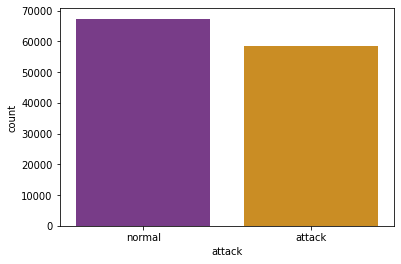

In [11]:
sns.countplot(data_Train.attack , palette = 'CMRmap')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='protocol_type', ylabel='count'>

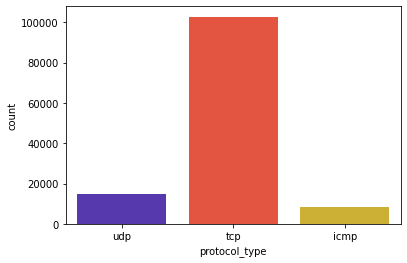

In [12]:
sns.countplot(data_Train[ 'protocol_type'], palette ='CMRmap')

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

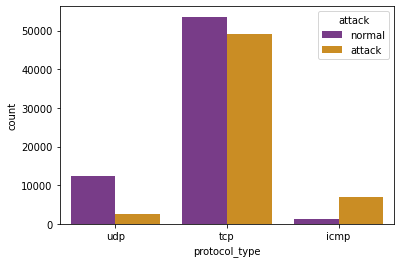

In [13]:
sns.countplot(x='protocol_type',hue='attack' , data = data_Train , palette ='CMRmap')

<AxesSubplot:xlabel='count', ylabel='service'>

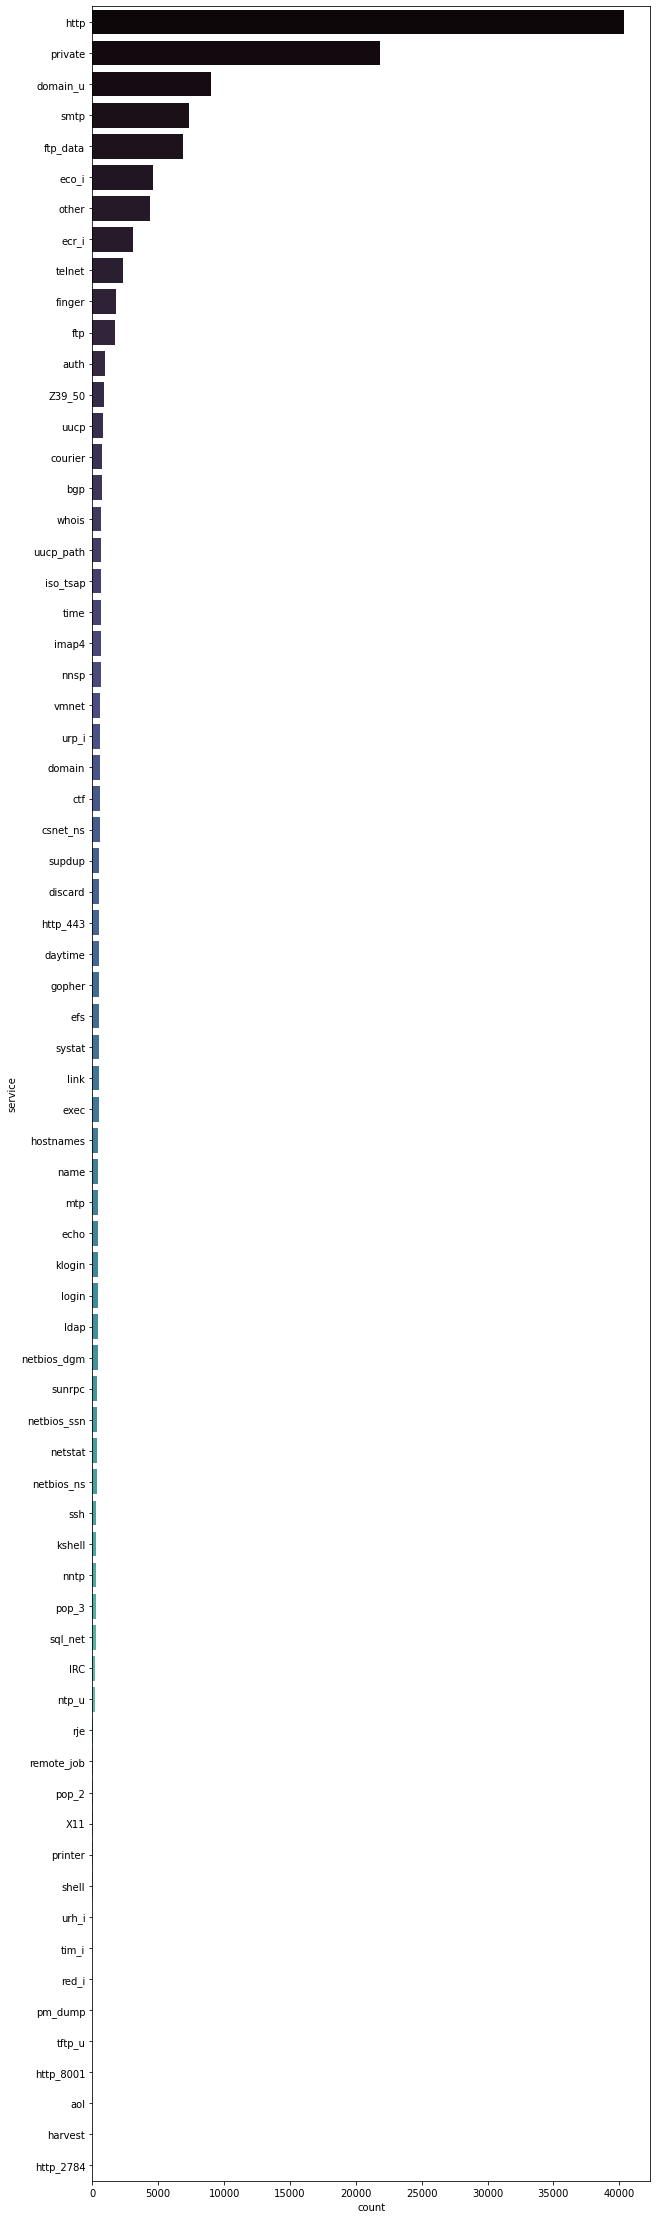

In [14]:
plt.figure(figsize=(10,40))
sns.countplot(palette='mako', y='service' , data=data_Train, order = data_Train['service'].value_counts().index)

<AxesSubplot:xlabel='flag', ylabel='count'>

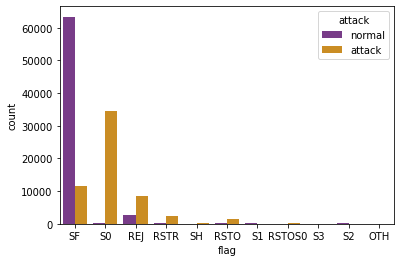

In [15]:
sns.countplot(x='flag',hue='attack' , data = data_Train , palette ='CMRmap')

-------------------------------------
## Data Encode 

In [16]:
data_obj = data_Train.select_dtypes(['object']).columns

In [17]:
data_Train["attack"].value_counts()

normal    67342
attack    58630
Name: attack, dtype: int64

In [18]:
data_obj

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()

In [20]:
data_Train['protocol_type'] = protocol_type_le.fit_transform(data_Train['protocol_type'])
data_Train['service'] = service_le.fit_transform(data_Train['service'])
data_Train['flag'] = flag_le.fit_transform(data_Train['flag'])

In [21]:
attack_n = []
for i in data_Train.attack :
  if i == 'normal':
    attack_n.append(0)
  else:
    attack_n.append(1)
data_Train['attack'] = attack_n 

In [22]:
data_Train['attack'].value_counts()

0    67342
1    58630
Name: attack, dtype: int64

now,data is encoded

<AxesSubplot:>

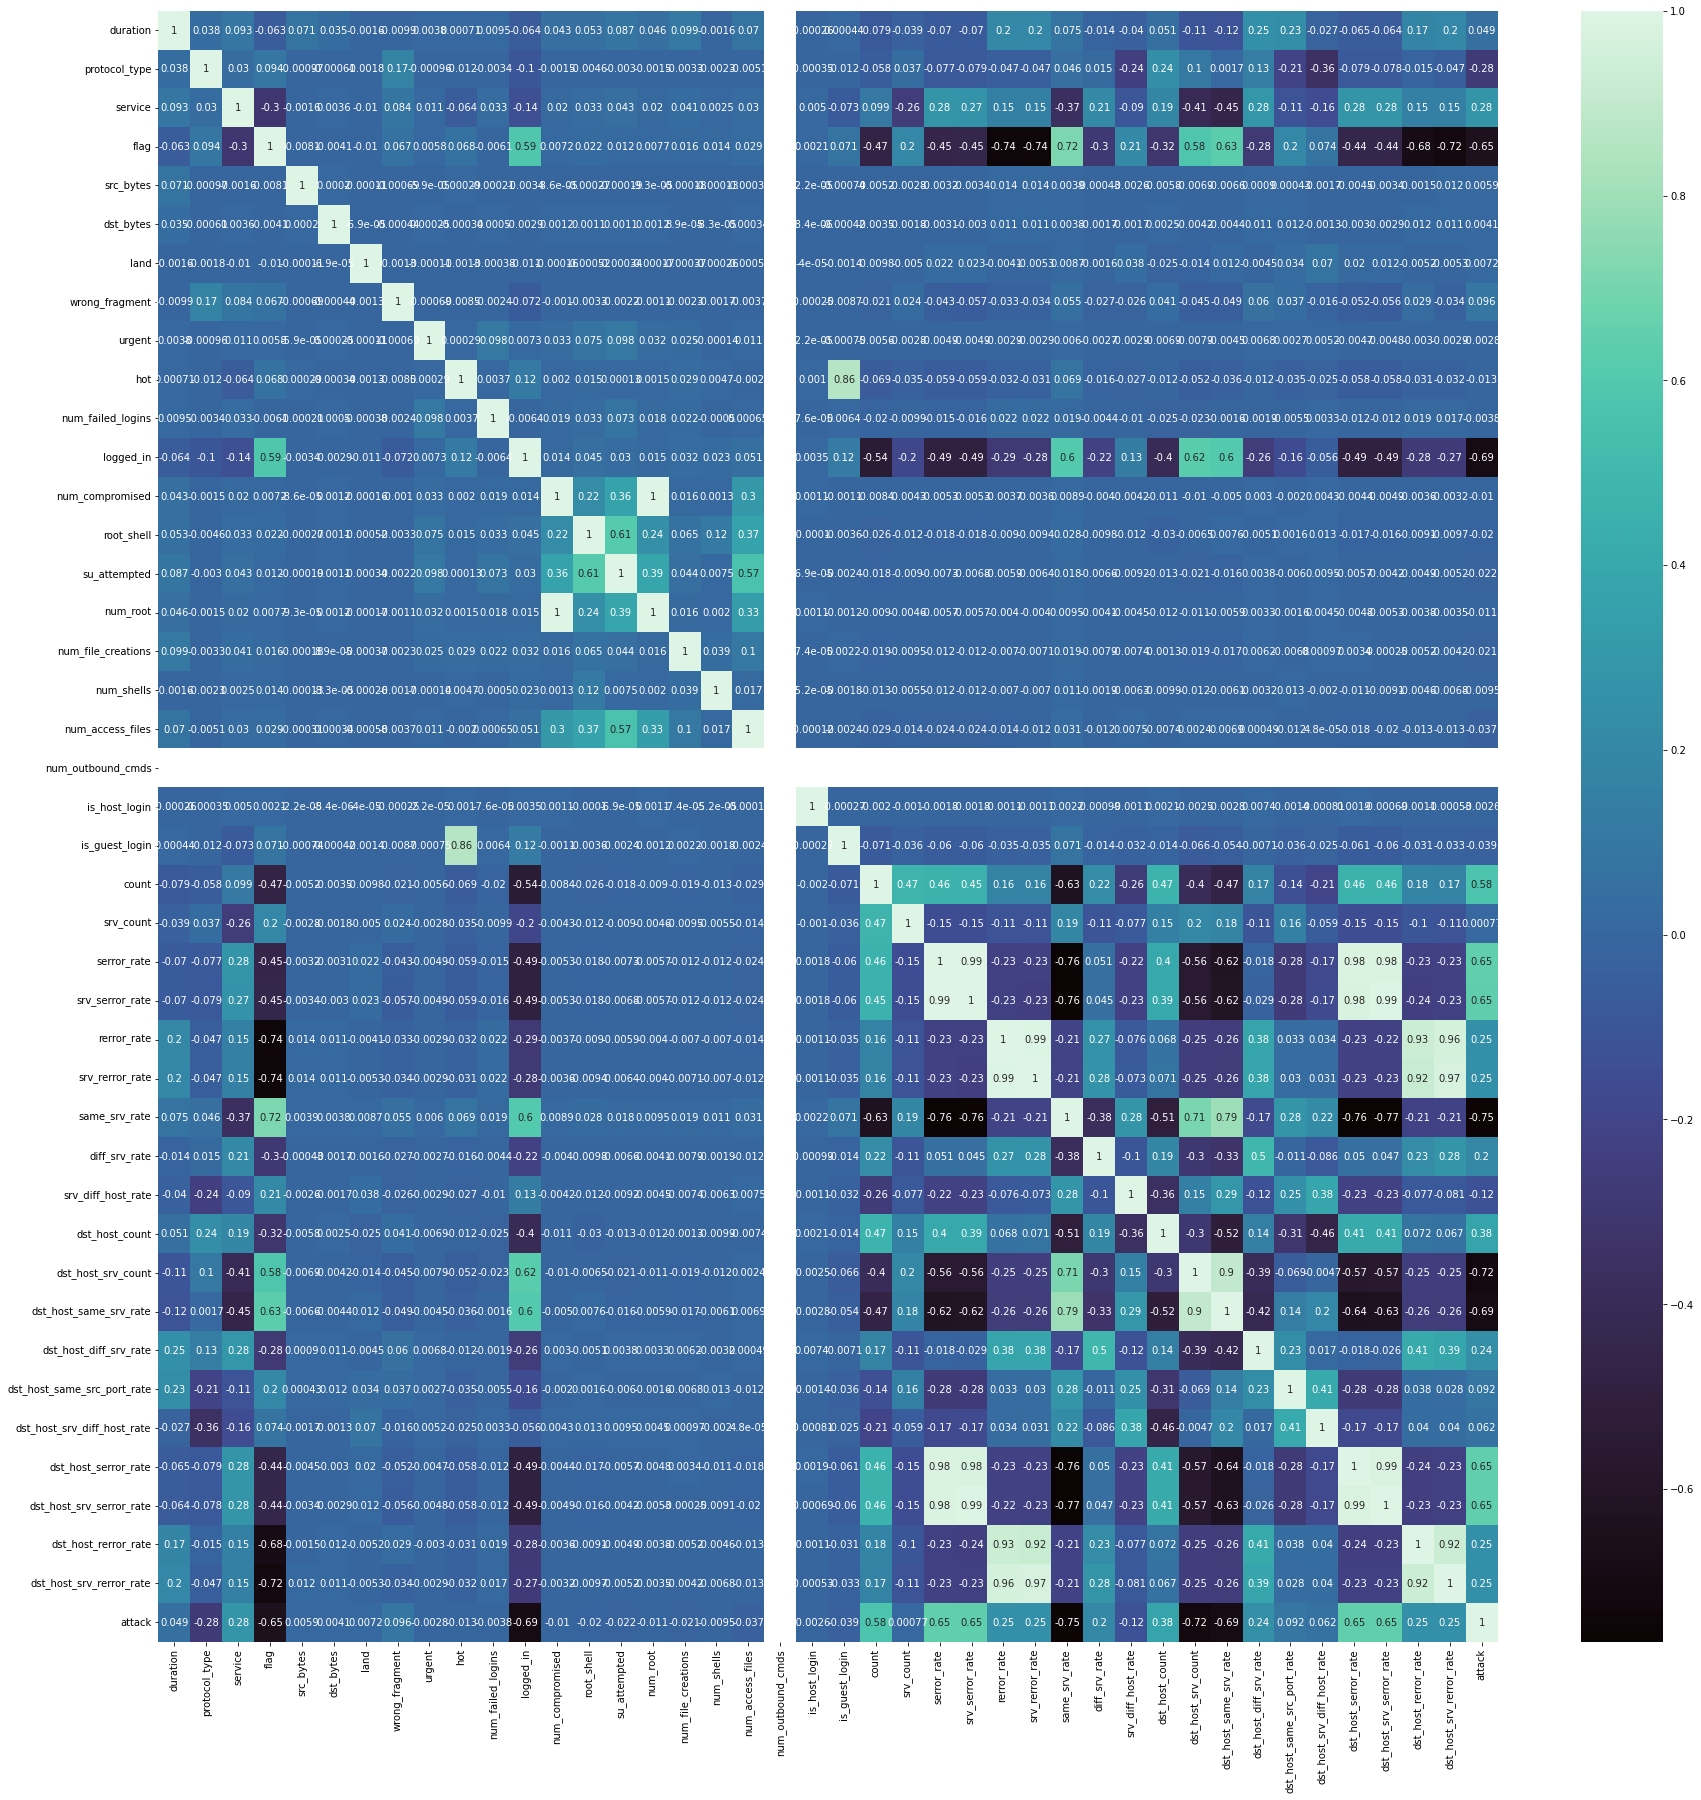

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(data_Train.corr(), annot= True,cmap='mako')

-----------------------------------
## Data Split

In [24]:
y = data_Train['attack'].copy()
x = data_Train.drop(['attack'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=40)

------------------------------------------
## **Data Scall**

In [25]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

------------------------------
## **Data Modeling**


### SVM Model


#### Linear Kernal SVC

In [26]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
Y_pred =lin_svc.predict(x_test)
print('The Training accuracy = ',lin_svc.score(x_train, y_train))
print('The Testing accuracy = ',lin_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "linearSVC  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred),3)))

The Training accuracy =  0.9561691993649354
The Testing accuracy =  0.9553609229466554
------------------------------------------------
linearSVC  accuracy  : 0.955


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [27]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     20006
           1       0.96      0.94      0.95     17786

    accuracy                           0.96     37792
   macro avg       0.96      0.95      0.96     37792
weighted avg       0.96      0.96      0.96     37792



-------------------------------
#### RBF Kernal

In [28]:

rbf_svc = svm.SVC(kernel='rbf').fit(x_train, y_train)
Y_pred_rbf =rbf_svc.predict(x_test)
print('The Training accuracy = ',rbf_svc.score(x_train, y_train))
print('The Testing accuracy = ',rbf_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'rbf')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_rbf),3)))

The Training accuracy =  0.9920843728736675
The Testing accuracy =  0.9914796782387807
------------------------------------------------
SVM (kernel: 'rbf')  accuracy  : 0.991


In [29]:
print(classification_report(y_test,Y_pred_rbf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20006
           1       0.99      0.99      0.99     17786

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



------------------------------
#### Poly Kernal

In [30]:
svclassifier_poly = SVC(kernel='poly')
poly = svclassifier_poly.fit(x_train,y_train)
Y_pred_poly =svclassifier_poly.predict(x_test)
print('The Training accuracy = ',poly.score(x_train, y_train))
print('The Testing accuracy = ',poly.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'poly')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_poly),3)))
print(classification_report(y_test,Y_pred_poly))

The Training accuracy =  0.9911317759129055
The Testing accuracy =  0.989997883149873
------------------------------------------------
SVM (kernel: 'poly')  accuracy  : 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20006
           1       0.99      0.99      0.99     17786

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



In [31]:
print(classification_report(y_test,Y_pred_poly))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20006
           1       0.99      0.99      0.99     17786

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



--------------------------
#### Grid Search

In [32]:
param_grid = {'C': [0.2,0.5,1], 'gamma': [0.5],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid ,verbose=2, cv= 3,refit=False)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time=  59.4s
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time= 1.0min
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time= 1.1min
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time= 1.2min
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time= 1.1min
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time= 1.5min
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time= 1.2min
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time= 1.2min
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time= 1.3min


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.2, 0.5, 1], 'gamma': [0.5], 'kernel': ['rbf']},
             refit=False, verbose=2)

In [33]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


In [34]:
rbf_svc = svm.SVC(kernel=grid.best_params_['kernel'], gamma=grid.best_params_['gamma'], C=grid.best_params_['C']).fit(x_train, y_train)
Y_pred_rbf =rbf_svc.predict(x_test)
print(rbf_svc.score(x_train, y_train))
print(rbf_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'rbf')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_rbf),3)))

0.9976525289181221
0.9947343353090601
------------------------------------------------
SVM (kernel: 'rbf')  accuracy  : 0.995


In [35]:
print(classification_report(y_test,Y_pred_rbf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20006
           1       1.00      0.99      0.99     17786

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



In [36]:
def plot_cm(y_true, y_pred, title):
    figsize=(10,10)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "mako", annot=annot, fmt='', ax=ax)

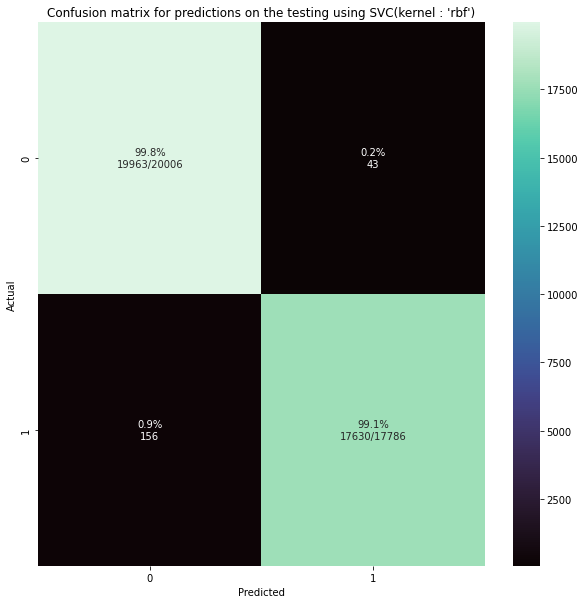

In [37]:
plot_cm(y_test,Y_pred_rbf, 'Confusion matrix for predictions on the testing using SVC(kernel : \'rbf\')')